# GN1の学習サンプルサイズごとの性能推移

In [1]:
import os
from typing import Tuple, Dict, List, Union, Any, Optional, Literal, MutableSequence
import argparse
import random
import warnings

import h5py
import yaml
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from tqdm import tqdm

from modules.compare import Comparator, ComparatorPlotter, RocAnalyzer

2023-11-28 15:21:09.324925: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base_dir = "./comparisons/GN1-samplesize/"
with open(os.path.join(base_dir, "config.yaml"), "r") as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [3]:
comparator_ttbar = Comparator(config, sample="ttbar")
comparator_plotter_ttbar = ComparatorPlotter(comparator_ttbar, save_dir=os.path.join(base_dir, "ttbar", "comparisons"))

meta model:	GN1-20M
Before cut nan:  4042856
After cut nan:  4042856
No cut by condition
Before cut nan:  4042856
After cut nan:  4042856
No cut by condition


In [4]:
btag_plot_roc = comparator_plotter_ttbar.plot_btag_rejection_comparison(lim_eff=(0.6, 1.0))
ctag_plot_roc = comparator_plotter_ttbar.plot_ctag_rejection_comparison(lim_eff=(0.2, 1.0))

Saved ./comparisons/GN1-samplesize/ttbar/comparisons/btag_rejection_comparison.pdf
Saved ./comparisons/GN1-samplesize/ttbar/comparisons/ctag_rejection_comparison.pdf


In [5]:
model_names = [model["name"] for model in config["models"]]
btag_roc_values = RocAnalyzer(model_names, btag_plot_roc).get_rejection_vlues_at_wp(wp=0.7)
ctag_roc_values = RocAnalyzer(model_names, ctag_plot_roc).get_rejection_vlues_at_wp(wp=0.3)

In [6]:
type(btag_roc_values["GN1-01M"]["Light-jets"][0])

float

In [10]:
if not os.path.exists("./comparisons/samplesize_all/rejection_values.yaml"):
    with open("./comparisons/samplesize_all/rejection_values.yaml", "w") as f:
        yaml.dump({"ttbar": {"btag": btag_roc_values, "ctag": ctag_roc_values}}, f, default_flow_style=False)
else:
    with open("./comparisons/samplesize_all/rejection_values.yaml", "r") as f:
        rejection_values = yaml.load(f, Loader=yaml.SafeLoader)
    rejection_values["ttbar"]["btag"].update(btag_roc_values)
    rejection_values["ttbar"]["ctag"].update(ctag_roc_values)

    with open("./comparisons/samplesize_all/rejection_values.yaml", "w") as f:
        yaml.dump(rejection_values, f, default_flow_style=False)

In [5]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 3500),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [6]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 150),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [7]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 600),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [8]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 50),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [9]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 6000),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [10]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 100),
    working_point=0.7,
    logy=False,
)

In [11]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 1000),
    working_point=0.3,
    logy=False,
)

In [12]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 80),
    working_point=0.3,
    logy=False,
)

In [13]:
# comparator_plotter_ttbar.plot_btag_iso_efficiency(
#     fc_values=np.linspace(0., 1.0, 101),
#     fc_target_value=0.018, wp=0.7, use_log=True,
#     # xlim=(1e-2, 1e0),
#     ylim=(1e-4, 2e-2),
# )

In [14]:
# comparator_plotter_ttbar.plot_ctag_iso_efficiency(
#     fb_values=np.linspace(0., 1.0, 101),
#     fb_target_value=0.20, wp=0.3, use_log=True,
#     # xlim=(1e-2, 1e0), ylim=(1e-4, 1e-2),
# )

In [15]:
comparator_zprime = Comparator(config, sample="zprime")
comparator_plotter_zprime = ComparatorPlotter(comparator_zprime, save_dir=os.path.join(base_dir, "zprime", "comparisons"))

Before cut nan:  4016172
After cut nan:  3997931
No cut by condition
Before cut nan:  4016172
After cut nan:  3997931
No cut by condition


In [16]:
comparator_plotter_zprime.plot_btag_rejection_comparison(lim_eff=(0.6, 1.0))
comparator_plotter_zprime.plot_ctag_rejection_comparison(lim_eff=(0.2, 1.0))

Saved ./comparisons/part-aux-metrics/zprime/comparisons/btag_rejection_comparison.pdf
Saved ./comparisons/part-aux-metrics/zprime/comparisons/ctag_rejection_comparison.pdf


In [17]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 150),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [18]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 10),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [19]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 50),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [20]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 15),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [21]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 120),
    working_point=0.7,
    logy=False,
)

In [22]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 10),
    working_point=0.7,
    logy=False,
)

In [23]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 60),
    working_point=0.3,
    logy=False,
)

In [24]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 20),
    working_point=0.3,
    logy=False,
)

In [25]:
# comparator_plotter_zprime.plot_btag_iso_efficiency(
#     fc_values=np.linspace(0., 1.0, 101),
#     fc_target_value=0.018, wp=0.7, use_log=True,
#     xlim = (1e-1, 1e-0),
#     # ylim=(0.025, 0.10),
# )

In [26]:
# comparator_plotter_zprime.plot_ctag_iso_efficiency(
#     fb_values=np.linspace(0., 1.0, 101),
#     fb_target_value=0.20, wp=0.3,
#     use_log=True,
#     # xlim = (0.19, 0.45),
#     # ylim=(0.025, 0.10),
# )

In [2]:
history = pd.read_csv("/home/suzukiy/ftag/particlenet-ftag/models/parT/GN1-MT/history.csv")
history

# remove train_btag_* and train_ctag_* columns
history = history.loc[:, ~history.columns.str.startswith("train_btag_")]
history = history.loc[:, ~history.columns.str.startswith("train_ctag_")]
# remove val_btag_* and val_ctag_* columns
history = history.loc[:, ~history.columns.str.startswith("val_btag_")]
history = history.loc[:, ~history.columns.str.startswith("val_ctag_")]

# change column names training_* -> train_* and validation_* -> val_*
history.columns = [c.replace("training_", "train_") for c in history.columns]
history.columns = [c.replace("validation_", "val_") for c in history.columns]
history

epoch  train_loss  train_acc  val_loss   val_acc  train_btag_rej_c  \
0       0    1.595476   0.669126  1.502024  0.681201          4.353627   
1       1    1.482449   0.690043  1.464195  0.687634          5.161659   
2       2    1.455721   0.694943  1.445035  0.691442          5.428263   
3       3    1.441263   0.697604  1.435982  0.692643          5.648385   
4       4    1.431532   0.699464  1.431437  0.693289          5.794136   
..    ...         ...        ...       ...       ...               ...   
95     95    1.361680   0.714972  1.511583  0.670643          7.490481   
96     96    1.361532   0.714984  1.398194  0.698862          7.493669   
97     97    1.361364   0.714986  1.396231  0.699274          7.463827   
98     98    1.361260   0.714999  1.491012  0.682574          7.466325   
99     99    1.361152   0.715126  1.399616  0.698561          7.517880   

    train_btag_rej_l  train_ctag_rej_b  train_ctag_rej_l  btag_wp  ctag_wp  \
0          72.225641          8.587543         42.115588      0.7      0.3   
1         124.401700         11.315224         65.097773      0.7      0.3   
2         140.695388         11.998217         71.128484      0.7      0.3   
3         152.581090         12.422137         74.653963      0.7      0.3   
4         162.169603         12.956761         79.272026      0.7      0.3   
..               ...               ...               ...      ...      ...   
95        263.997980         15.845100        105.667802      0.7      0.3   
96        264.733297         15.962883        106.614495      0.7      0.3   
97        262.520697         15.904945        106.527591      0.7      0.3   
98        262.671452         16.007618        107.609940      0.7      0.3   
99        264.838677         15.956567        106.808990      0.7      0.3   

    val_btag_rej_c  val_btag_rej_l  val_ctag_rej_b  val_ctag_rej_l  
0         4.623759       99.146113       10.753450       53.164044  
1         5.229118      115.406900       11.004867       66.480276  
2         5.177114      125.550170       12.297588       66.400698  
3         5.292106      129.860905       12.599830       66.566700  
4         5.717525      128.333719       11.924268       74.342975  
..             ...             ...             ...             ...  
95        5.419795       62.580333       11.569131       35.654365  
96        6.807930      138.767355       12.304167       83.343809  
97        6.781504      145.660175       12.375397       82.660748  
98        5.347230      110.392537       12.488241       41.182071  
99        6.390755      142.236538       12.581054       80.191182  

[100 rows x 15 columns]

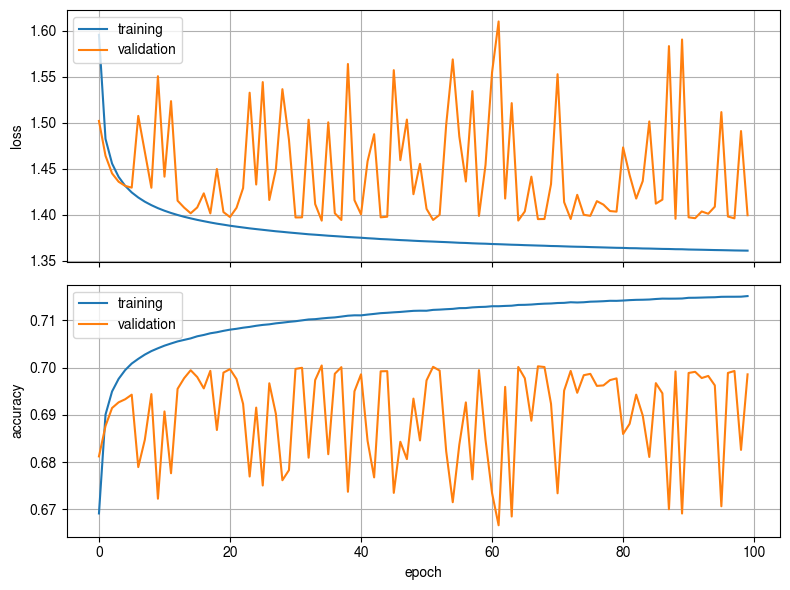

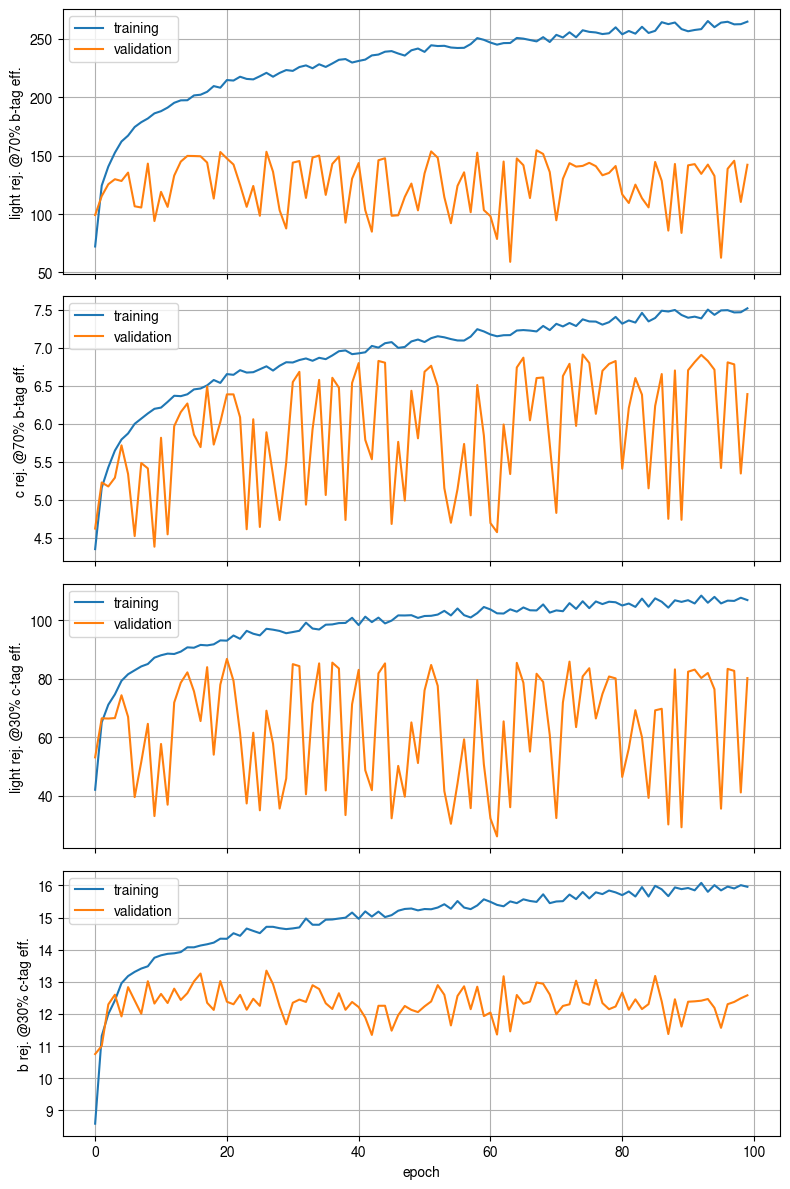

In [82]:

%matplotlib inline
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
ax[0].plot(history["train_loss"], label="training")
ax[0].plot(history["val_loss"], label="validation")
ax[0].set_ylabel("loss")
ax[0].legend()
ax[0].grid()
ax[1].plot(history["train_acc"], label="training")
ax[1].plot(history["val_acc"], label="validation")
ax[1].set_ylabel("accuracy")
ax[1].set_xlabel("epoch")
ax[1].legend()
ax[1].grid()
fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_plot_loss_acc.pdf"))
plt.show()

fig, ax = plt.subplots(4, 1, figsize=(8, 12), sharex=True)
ax[0].plot(history["train_btag_rej_l"], label="training")
ax[0].plot(history["val_btag_rej_l"], label="validation")
ax[0].set_ylabel("light rej. @70% b-tag eff.")
ax[0].legend()
ax[0].grid()
ax[1].plot(history["train_btag_rej_c"], label="training")
ax[1].plot(history["val_btag_rej_c"], label="validation")
ax[1].set_ylabel("c rej. @70% b-tag eff.")
ax[1].legend()
ax[1].grid()
ax[2].plot(history["train_ctag_rej_l"], label="training")
ax[2].plot(history["val_ctag_rej_l"], label="validation")
ax[2].set_ylabel("light rej. @30% c-tag eff.")
ax[2].legend()
ax[2].grid()
ax[3].plot(history["train_ctag_rej_b"], label="training")
ax[3].plot(history["val_ctag_rej_b"], label="validation")
ax[3].set_ylabel("b rej. @30% c-tag eff.")
ax[3].set_xlabel("epoch")
ax[3].legend()
ax[3].grid()
fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_plot_rej.pdf"))
plt.show()

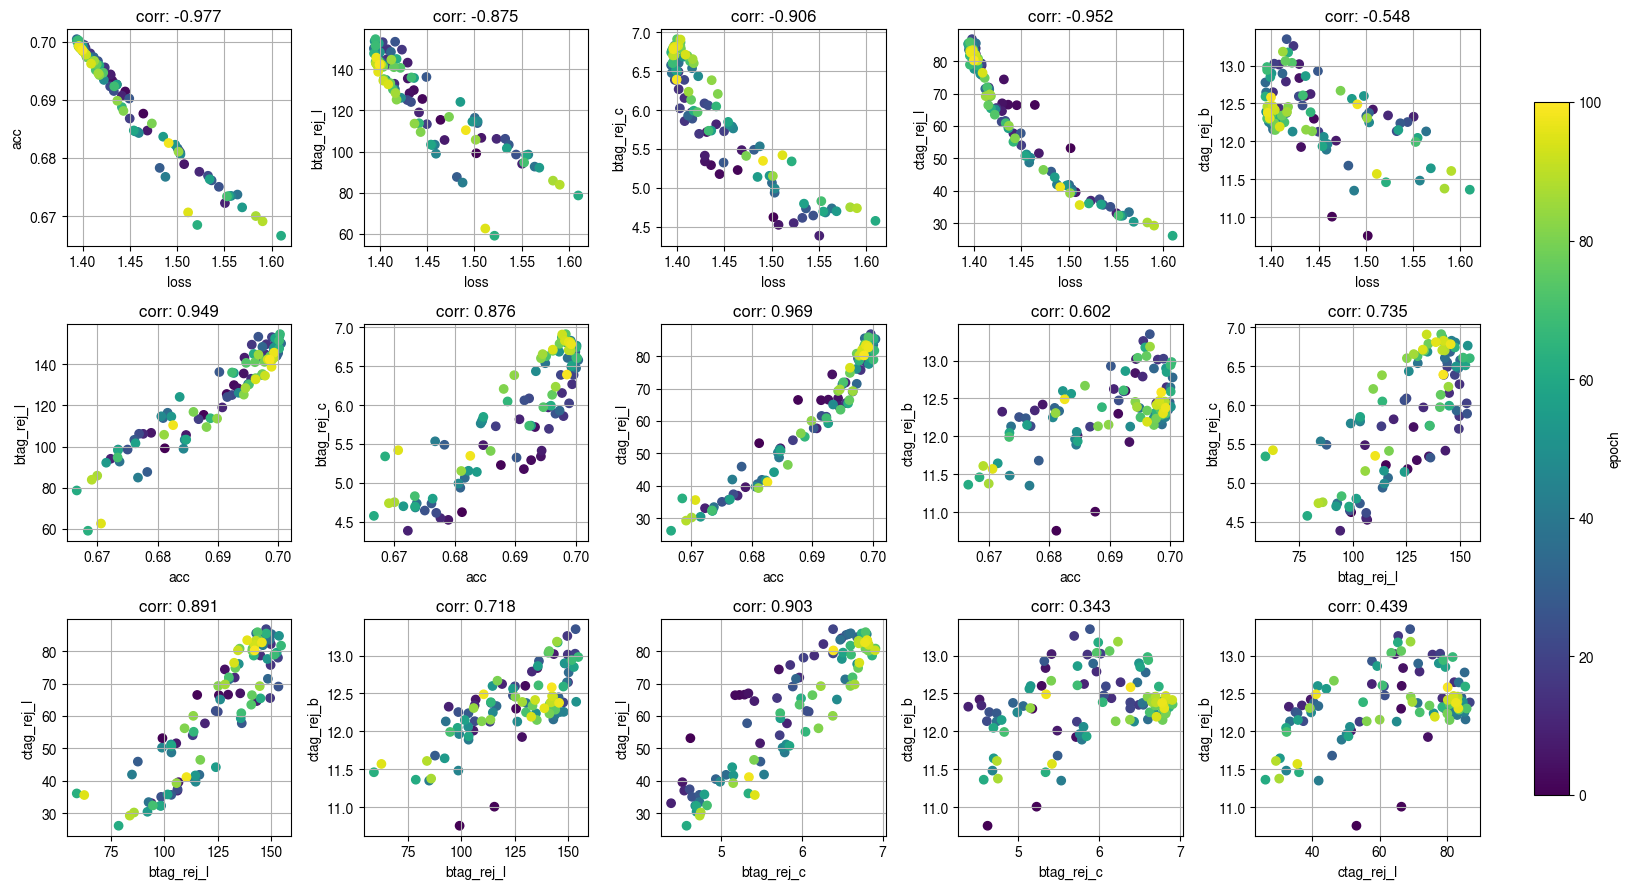

In [9]:
# 各性能指標の全通りの組み合わせをプロットする(validationのみ)
%matplotlib inline
from itertools import combinations

metrics_name = ["loss", "acc", "btag_rej_l", "btag_rej_c", "ctag_rej_l", "ctag_rej_b"]

# for metric1, metric2 in combinations(metrics_name, 2):
#     fig, ax = plt.subplots(1, 1, figsize=(7, 6))
#     ax.scatter(history[f"val_{metric1}"], history[f"val_{metric2}"], c=history["epoch"], vmin=0, vmax=100)
#     cbar = fig.colorbar(ax.collections[0], ax=ax)
#     cbar.set_label("epoch")
#     ax.set_xlabel(metric1)
#     ax.set_ylabel(metric2)
#     ax.grid()
#     fig.tight_layout()
#     fig.savefig(os.path.join(base_dir, f"history_{metric1}_{metric2}.pdf"))
#     plt.show()

corr = history[[f"val_{m}" for m in metrics_name]].corr()

# 一枚にまとめたプロットも作る
fig, ax = plt.subplots(3, 5, figsize=(5*3, 3*3))
for i, (metric1, metric2) in enumerate(combinations(metrics_name, 2)):
    ax[i//5, i%5].scatter(history[f"val_{metric1}"], history[f"val_{metric2}"], c=history["epoch"], vmin=0, vmax=100)
    ax[i//5, i%5].set_title(f"corr: {corr.loc[f'val_{metric1}', f'val_{metric2}']:.3f}")
    ax[i//5, i%5].set_xlabel(metric1)
    ax[i//5, i%5].set_ylabel(metric2)
    ax[i//5, i%5].grid()
# 右端にカラーバーを追加
# 右端に余白を作る
fig.subplots_adjust(right=1.05)
cbar = fig.colorbar(ax[0,0].collections[0], ax=ax[:, -1])
cbar.set_label("epoch")


fig.tight_layout()
fig.savefig(os.path.join(base_dir, "history_all.pdf"))
plt.show()